In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math
from scipy.special import gamma

In [2]:
class GIUH:
    def __init__(self, Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step):
        #self.Q = Q
        self.Qmax = Qmax
        self.tc = tc
        self.m_Rb = m_Rb
        self.m_Ra = m_Rb
        self.m_Rl = m_Rl
        self.L = L
        self.t = t
        self.GIUH_step = GIUH_step
        self.comp_u = []
        self.GIUH_list = []  
        
    def GIUH_v(self):
        self.v = 0.44 * ((giuh.Ra / giuh.Rb ) ** 0.55) * ((giuh.L/1000)  ** (-0.38)) * (giuh.L/1000) / self.tc
        
    def GIUH_vars(self):
        self.a = 3.29 * ((self.Rb / self.Ra) ** 0.78) * (self.Rl ** 0.07)
        self.k = 0.7 * ((self.Ra / (self.Rb * self.Rl)) ** 0.48) * L / self.v
        return 
    
    def GIUH_Rs(self):
        self.Rb = 1 / (10 ** m_Rb)
        self.Ra = 10 ** m_Ra
        self.Rl = 10 ** m_Rl
        return 
    
    def GIUH_U(self):
        self.u = ((self.time / self.k) ** (self.a - 1)) * np.exp(-self.time / self.k) / (self.k * gamma(self.a))
        return 

    def GIUH_qp(self):
        self.qp = (1.31 / (self.L / 1000)) * (self.Rl ** 0.43) * self.v
        return 

    def GIUH_tp(self):
        self.tp = 0.44 * ((self.Ra / self.Rb ) ** 0.55) * ((self.L / 1000)  ** (-0.38)) * (self.L / 1000) / self.v
        return 
    
    def GIUH_loop(self):
        for i in range(len(t)):
            self.time = t[i]
            self.GIUH_U()
            self.comp_u.append(self.u)
            
    def GIUH_plot(self):
        figure(figsize=(20, 10), dpi=300)
        plt.plot(self.t, self.comp_u, linewidth=5.0)
        plt.xlabel("Time(s)", size = 30)
        plt.ylabel("GIUH", size = 30)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.grid(True)
        plt.show()
        
    def altElement(self):
            return self.comp_u[::self.GIUH_step] 
        
    def GIUH_ordinates(self):
        self.GIUH_list = self.altElement()
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] * self.GIUH_step
        self.GIUH_list.pop(0)
        print("   Length of the GIUH ordinates: {:9.1f}".format(len(self.GIUH_list)))
        self.res = (1 - np.sum(self.GIUH_list)) / len(self.GIUH_list)
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] + self.res 
        print("\n   Sum of the GIUH ordinates: {:9.10f}".format(np.sum(self.GIUH_list)))

In [22]:
# Q =
Qmax = 207 * 0.028316846592 # 6/17/2000 #63.41 * 0.028316846592      # m^3/s
tc =  15 / 60# 14 / 60 S3# 15 / 60 S4#       
m_Ra = 0.526 #0.716 S3#0.526 S4
m_Rb = -0.716 #-0.664 S3#-0.716 S4
m_Rl = 0.134 #0.463 S3#0.134 S4
L = 833 #8141 S3 #833 S4                           # m
t = [i for i in range(8000)] # s4           # s
GIUH_step = 80

giuh = GIUH(Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step)
   # m/s

In [23]:
giuh.GIUH_Rs()
giuh.GIUH_v()
giuh.GIUH_vars()
giuh.GIUH_qp()
giuh.GIUH_tp()
giuh.GIUH_loop()

In [24]:
print("   Qmax of the GIUH: {:9.10f}".format(giuh.Qmax) + " m^3/s")
print("   Ra of the GIUH: {:9.10f}".format(giuh.Ra))
print("   Rb of the GIUH: {:8.4f}".format(giuh.Rb))
print("   Rl of the GIUH: {:9.10f}".format(giuh.Rl))
print("   v of the GIUH: {:8.4f}".format(giuh.v) + " m/s")
print("   L of the GIUH: {:8.4f}".format(giuh.L) + " m/s")
print("   k of the GIUH: {:9.10f}".format(giuh.k))
print("   a of the GIUH: {:8.4f}".format(giuh.a))
print("   peak discharge of the GIUH: {:9.10f}".format(giuh.qp))
print("   The time to peak of the GIUH: {:8.4f}".format(giuh.tp))

   Qmax of the GIUH: 5.8615872445 m^3/s
   Ra of the GIUH: 3.3573761424
   Rb of the GIUH:   5.2000
   Rl of the GIUH: 1.3614446825
   v of the GIUH:   1.2354 m/s
   L of the GIUH: 833.0000 m/s
   k of the GIUH: 329.9213895370
   a of the GIUH:   4.7291
   peak discharge of the GIUH: 2.2184970877
   The time to peak of the GIUH:   0.2500


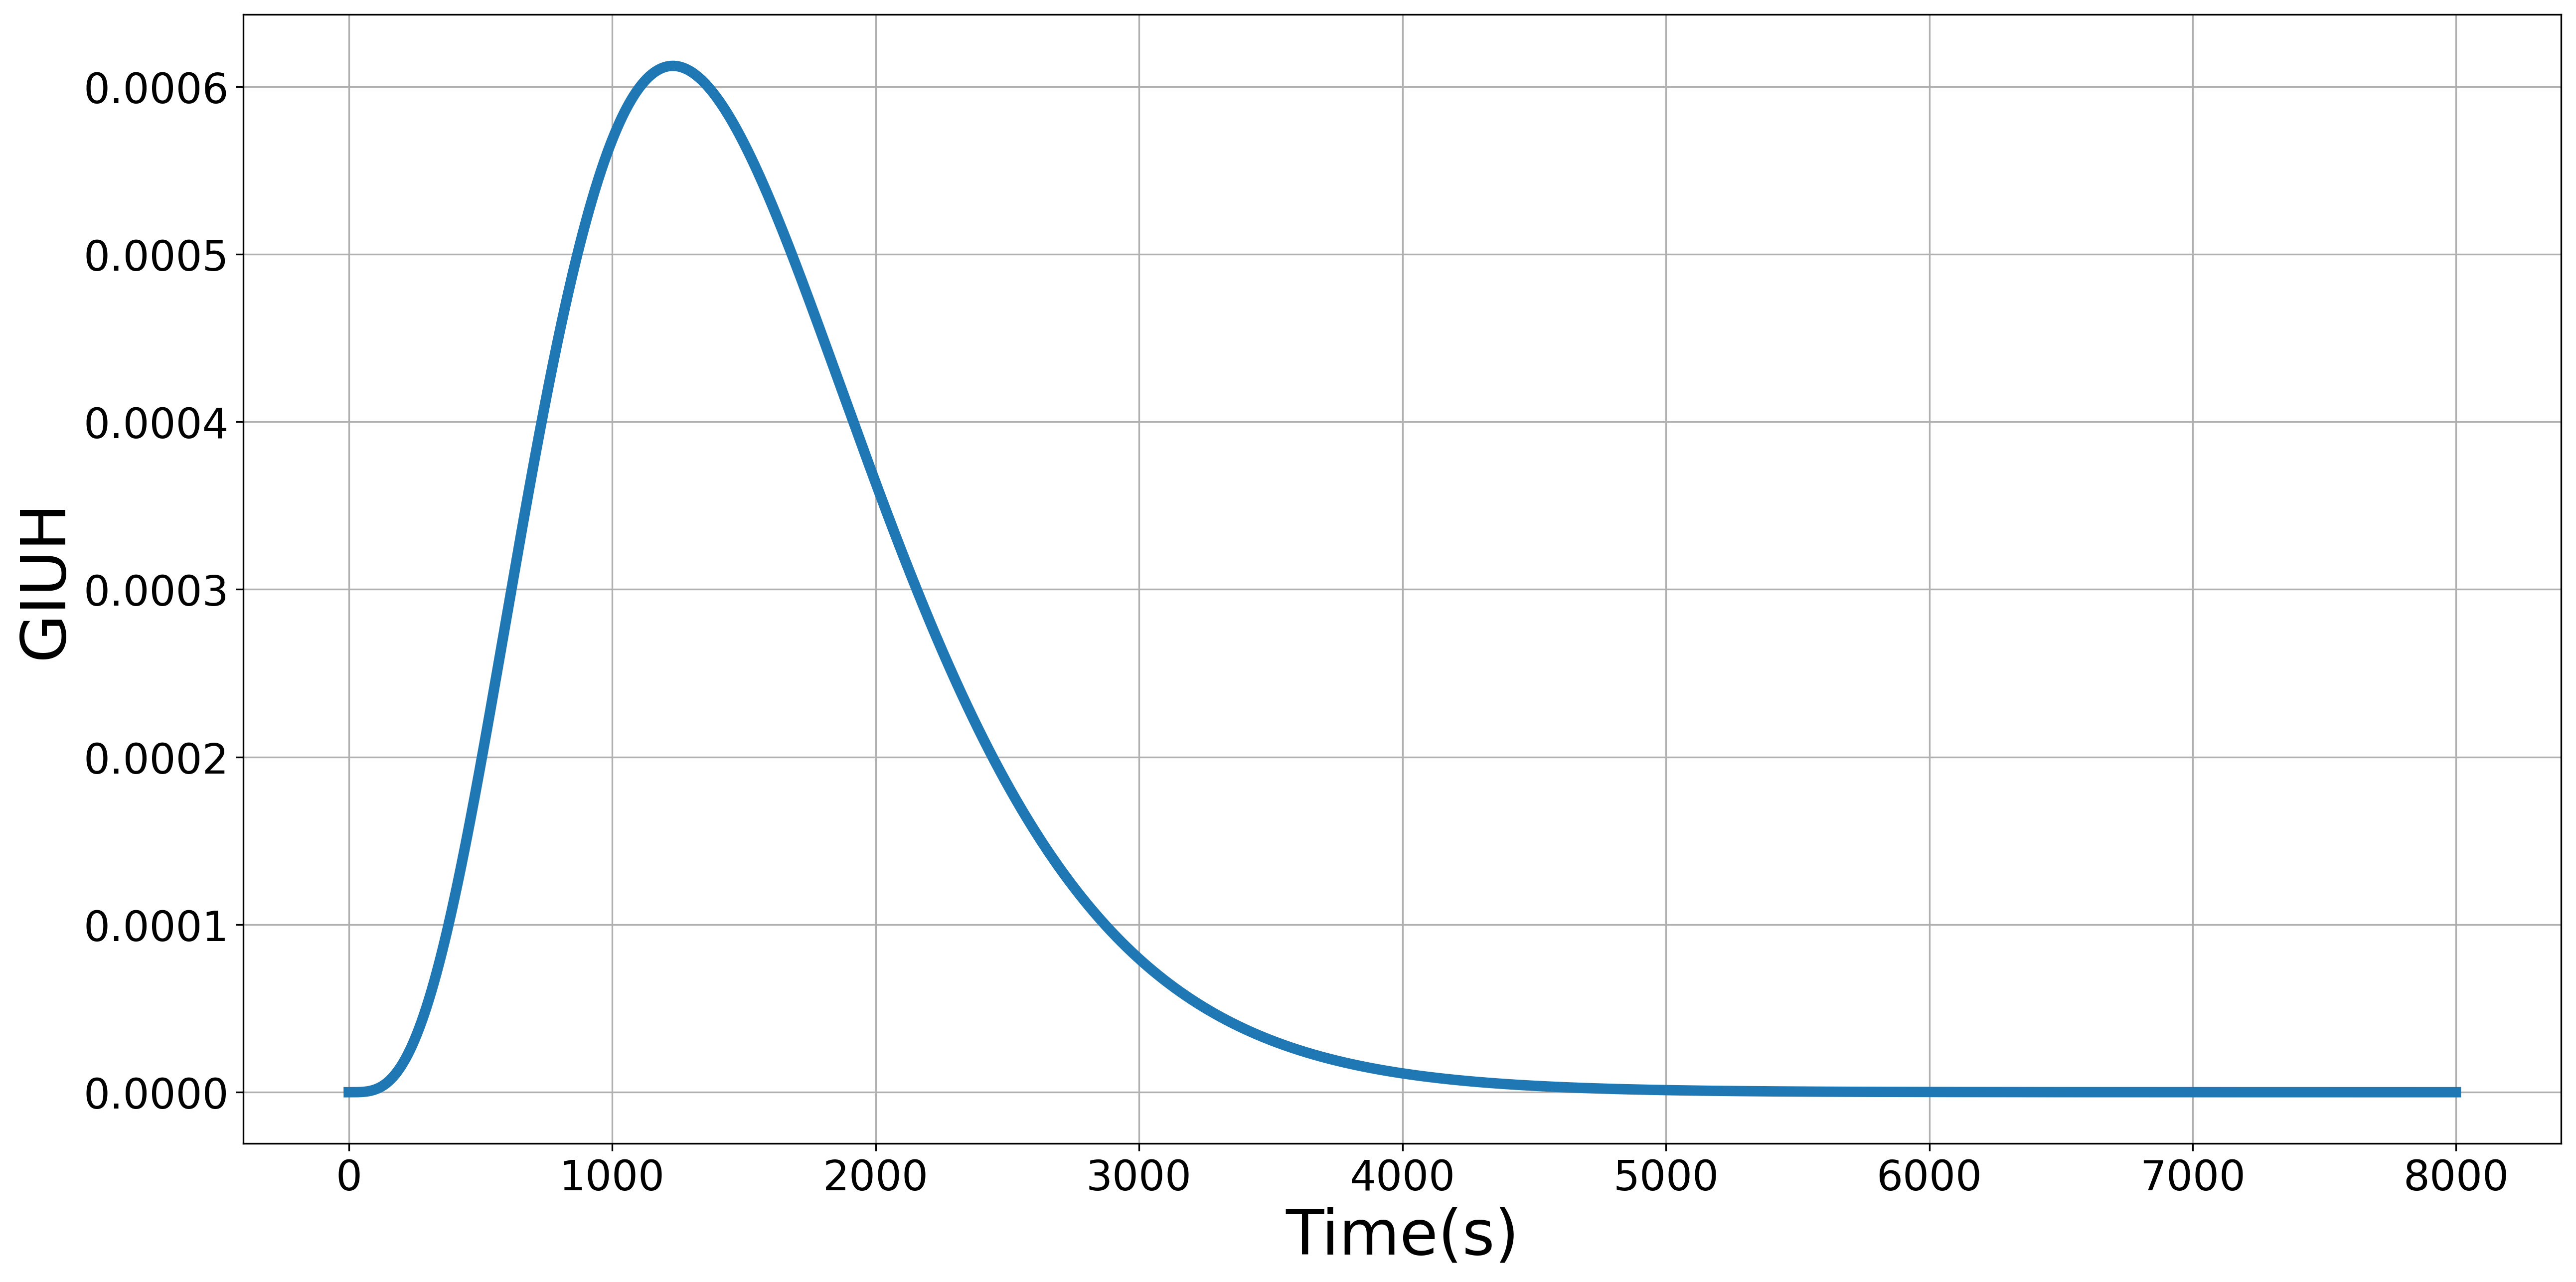

In [25]:
giuh.GIUH_plot()

In [26]:
giuh.GIUH_ordinates()

   Length of the GIUH ordinates:      99.0

   Sum of the GIUH ordinates: 1.0000000000


In [27]:
giuh.GIUH_list

[6.000765324368488e-05,
 0.0006243868788568978,
 0.0022222943776766153,
 0.005097983008922422,
 0.009193357193187942,
 0.014237641837127567,
 0.0198508375891752,
 0.02562868730399501,
 0.03120104831068525,
 0.036265490018698616,
 0.040601421831199073,
 0.04407059334330882,
 0.04660909676411052,
 0.048214879035758586,
 0.048933636643301935,
 0.048844988970428375,
 0.048050058351778856,
 0.046661021957457326,
 0.04479281328927776,
 0.042556903118177364,
 0.040056946091549535,
 0.03738600977766881,
 0.034625083327666256,
 0.03184257472310454,
 0.02909453525012055,
 0.026425387988429014,
 0.02386897747679707,
 0.021449796423820815,
 0.019184280172986828,
 0.01708208957004589,
 0.015147327653563492,
 0.013379655407690918,
 0.011775287160215137,
 0.01032785768585476,
 0.009029161324754434,
 0.007869769064641414,
 0.006839533120153344,
 0.005927990559442384,
 0.00512467838403897,
 0.0044193724962413574,
 0.003802262454143136,
 0.0032640730235726466,
 0.0027961424441706913,
 0.0023904661476351